In [8]:
import numpy as np
import pandas as pd

In [11]:
df = pd.read_csv("./yieldrate.tsv",sep='\t')
df.head()

,Date,1Mo,2Mo,3Mo,6Mo,1Yr,2Yr,3Yr,5Yr,7Yr,10Yr,20Yr,30Yr
0,01/04/16,0.17,NaN,0.22,0.49,0.61,1.02,1.31,1.73,2.06,2.24,2.64,2.98
1,01/05/16,0.20,NaN,0.20,0.49,0.68,1.04,1.32,1.73,2.06,2.25,2.67,3.01
2,01/06/16,0.21,NaN,0.21,0.47,0.67,0.99,1.26,1.65,1.98,2.18,2.59,2.94
3,01/07/16,0.20,NaN,0.20,0.46,0.66,0.96,1.22,1.61,1.94,2.16,2.56,2.92
4,01/08/16,0.20,NaN,0.20,0.45,0.64,0.94,1.20,1.57,1.91,2.13,2.55,2.91


In [22]:
def derivativeFromPoints(row):
    return (row['10Yr'] - row['1Mo'] )/(12 * 10)

df['derivative'] = df.apply(derivativeFromPoints, axis = 1)




df.tail()

,Date,1Mo,2Mo,3Mo,6Mo,1Yr,2Yr,3Yr,5Yr,7Yr,10Yr,20Yr,30Yr,derivative
912,08/26/19,2.09,2.03,2.01,1.90,1.75,1.54,1.47,1.43,1.49,1.54,1.84,2.04,-0.004583
913,08/27/19,2.07,2.03,1.98,1.94,1.77,1.53,1.43,1.40,1.44,1.49,1.77,1.97,-0.004833
914,08/28/19,2.07,2.04,1.99,1.89,1.74,1.50,1.42,1.37,1.42,1.47,1.76,1.94,-0.005000
915,08/29/19,2.10,2.03,1.99,1.89,1.75,1.53,1.44,1.40,1.46,1.50,1.78,1.97,-0.005000
916,08/30/19,2.10,2.04,1.99,1.89,1.76,1.50,1.42,1.39,1.45,1.50,1.78,1.96,-0.005000


In [40]:
import datetime as dt

def formatDate(d):
    return dt.datetime.strptime(d,'%m/%d/%y').date()

formatDate('08/28/19')

df['Date'] = df['Date'].apply(formatDate)

df.tail()

,Date,1Mo,2Mo,3Mo,6Mo,1Yr,2Yr,3Yr,5Yr,7Yr,10Yr,20Yr,30Yr,derivative
912,2019-08-26,2.09,2.03,2.01,1.90,1.75,1.54,1.47,1.43,1.49,1.54,1.84,2.04,-0.004583
913,2019-08-27,2.07,2.03,1.98,1.94,1.77,1.53,1.43,1.40,1.44,1.49,1.77,1.97,-0.004833
914,2019-08-28,2.07,2.04,1.99,1.89,1.74,1.50,1.42,1.37,1.42,1.47,1.76,1.94,-0.005000
915,2019-08-29,2.10,2.03,1.99,1.89,1.75,1.53,1.44,1.40,1.46,1.50,1.78,1.97,-0.005000
916,2019-08-30,2.10,2.04,1.99,1.89,1.76,1.50,1.42,1.39,1.45,1.50,1.78,1.96,-0.005000


In [41]:
filtered = df[df['derivative']<0]
filtered.tail()

,Date,1Mo,2Mo,3Mo,6Mo,1Yr,2Yr,3Yr,5Yr,7Yr,10Yr,20Yr,30Yr,derivative
912,2019-08-26,2.09,2.03,2.01,1.90,1.75,1.54,1.47,1.43,1.49,1.54,1.84,2.04,-0.004583
913,2019-08-27,2.07,2.03,1.98,1.94,1.77,1.53,1.43,1.40,1.44,1.49,1.77,1.97,-0.004833
914,2019-08-28,2.07,2.04,1.99,1.89,1.74,1.50,1.42,1.37,1.42,1.47,1.76,1.94,-0.005000
915,2019-08-29,2.10,2.03,1.99,1.89,1.75,1.53,1.44,1.40,1.46,1.50,1.78,1.97,-0.005000
916,2019-08-30,2.10,2.04,1.99,1.89,1.76,1.50,1.42,1.39,1.45,1.50,1.78,1.96,-0.005000


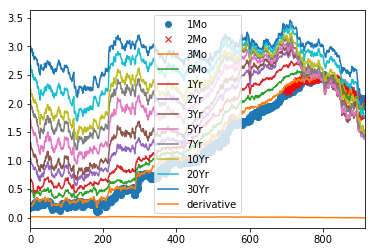

In [42]:
import matplotlib.pyplot as plt

df.plot(style=['o','rx'])
plt.savefig('outputfile.png')
plt.show()


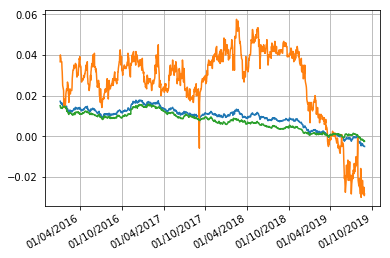

In [54]:
import matplotlib.dates as mdates

plt.figure()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(df['Date'], df['derivative'])
plt.plot(df['Date'], (df['1Yr'] - df['1Mo']) / 12 )
plt.plot(df['Date'], (df['10Yr'] - df['1Yr']) / (12*9) )
plt.grid()
plt.gcf().autofmt_xdate()
plt.show()